### 0719 DOING frame consistency

## ELAN Evaluation metrics (Dim delta, depth, alpha, Dim consistency)

In [ ]:
from library.ron_utils import *
import matplotlib.pyplot as plt
from library.ron_utils import iou_2d, TrackingObject
from ELAN_label_trackID import tracking_obj_by_labels
from ELAN_EVAL import evaluation

'''
cam_to_img = np.array([
        [ 1.418667e+03, 0.000000e+00, 6.4e+02,0],
        [ 0.000000e+00, 1.418667e+03, 3.6e+02,0],
        [ 0.000000e+00, 0.000000e+00, 1.000000e+00,0]])
'''

def ELAN_eval_metrics(result_root):
    valset = [x.strip() for x in open('Elan_3d_box/ImageSets/val.txt').readlines()]
    dim_GT = list()
    dim_ELAN = list()
    depth_GT = list()
    depth_ELAN = list()
    alpha_GT = list()
    alpha_ELAN = list()
    #set_ = set()
    for id_ in valset:
        gt_lines = [x.strip() for x in open(f'Elan_3d_box/renew_label_obj/{id_}.txt').readlines()]
        gt_objects = [TrackingObject(line) for line in gt_lines if line.split()[0].lower()=='car']
        
        for obj in gt_objects:
            #set_.add(obj.id)
            dim_GT.append(obj.dims[0])
            depth_GT.append(obj.locs[0][2])
            alpha_GT.append(obj.alphas[0])
            
        pred_lines = [x.strip() for x in open(f'{result_root}/label_2/{id_}.txt').readlines()]
        pred_objects = [TrackingObject(line) for line in pred_lines if line.split()[0].lower()=='car']
        for obj in pred_objects:
            dim_ELAN.append(obj.dims[0])
            depth_ELAN.append(obj.locs[0][2])
            alpha_ELAN.append(obj.alphas[0])
    
    #print('OBJECT NUM', len(set_))
    #print(set_)
    dim_GT = np.array(dim_GT)
    dim_ELAN = np.array(dim_ELAN)
    depth_GT = np.array(depth_GT)
    depth_ELAN = np.array(depth_ELAN)
    alpha_GT = np.array(alpha_GT)
    alpha_ELAN = np.array(alpha_ELAN)

    depth_diff = depth_GT-depth_ELAN
    alpha_diff = np.cos(alpha_GT - alpha_ELAN)
    dim_diff = np.mean(abs(dim_GT-dim_ELAN), axis=0)
    print(f'[DIM diff] H:{dim_diff[0]:.4f}, W:{dim_diff[1]:.4f}, L:{dim_diff[2]:.4f}')
    
    print(f'[Alpha diff] abs_mean: {1-alpha_diff.mean():.4f}')
    plt.hist(alpha_diff)
    plt.show()
    print(f'[Depth diff] abs_mean: {abs(depth_diff).mean():.4f}')
    print('[Depth error]')
    box_depth_error_calculation(depth_GT, depth_ELAN, 5)

========0720/BL_B4_N0========
[DIM diff] H:0.2205, W:0.1631, L:0.6804
[Alpha diff] abs_mean: 0.2245


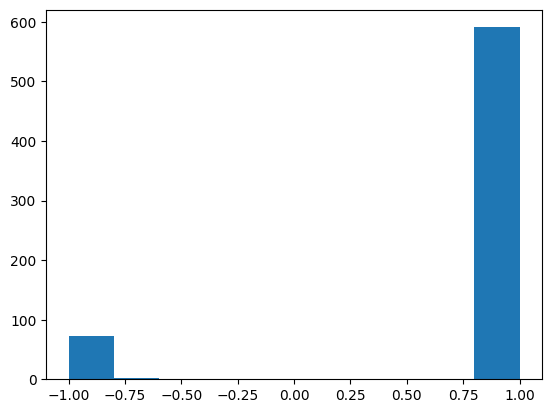

[Depth diff] abs_mean: 4.8813
[Depth error]
num of Car: 665
	num of depth 0-10: 0 
	num of depth 10-20: 68   abs_delta mean:3.046m, Out of 5m: 11
	num of depth 20-30: 142   abs_delta mean:3.765m, Out of 5m: 40
	num of depth 30-40: 259   abs_delta mean:4.236m, Out of 5m: 85
	num of depth 40-50: 95   abs_delta mean:6.668m, Out of 5m: 50
	num of depth 50-60: 50   abs_delta mean:8.223m, Out of 5m: 29
	num of depth 60+: 51     abs_delta mean:7.109m, Out of 5m: 30
[Total] mean:4.881, std:4.555

========0720/V_dim_B4_N0========
[DIM diff] H:0.1745, W:0.1414, L:0.5205
[Alpha diff] abs_mean: 0.2215


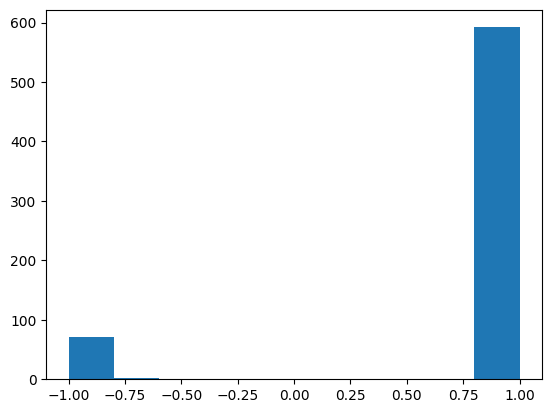

[Depth diff] abs_mean: 4.5878
[Depth error]
num of Car: 665
	num of depth 0-10: 0 
	num of depth 10-20: 68   abs_delta mean:2.998m, Out of 5m: 9
	num of depth 20-30: 142   abs_delta mean:3.598m, Out of 5m: 39
	num of depth 30-40: 259   abs_delta mean:3.784m, Out of 5m: 71
	num of depth 40-50: 95   abs_delta mean:6.776m, Out of 5m: 51
	num of depth 50-60: 50   abs_delta mean:7.271m, Out of 5m: 25
	num of depth 60+: 51     abs_delta mean:6.841m, Out of 5m: 31
[Total] mean:4.588, std:4.524

========0720/V_alpha_B4_N0========
[DIM diff] H:0.1417, W:0.1310, L:0.4727
[Alpha diff] abs_mean: 0.0234


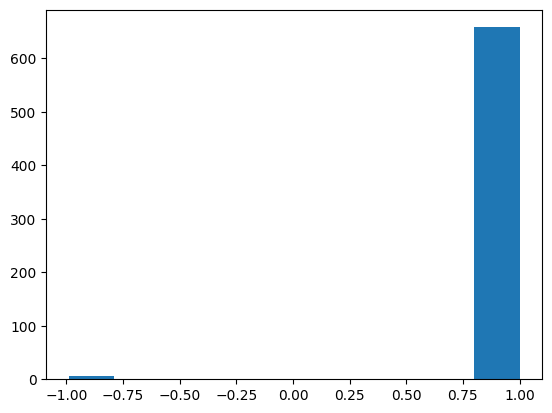

[Depth diff] abs_mean: 3.8236
[Depth error]
num of Car: 665
	num of depth 0-10: 0 
	num of depth 10-20: 68   abs_delta mean:1.542m, Out of 5m: 1
	num of depth 20-30: 142   abs_delta mean:3.195m, Out of 5m: 36
	num of depth 30-40: 259   abs_delta mean:2.824m, Out of 5m: 50
	num of depth 40-50: 95   abs_delta mean:5.217m, Out of 5m: 34
	num of depth 50-60: 50   abs_delta mean:7.798m, Out of 5m: 24
	num of depth 60+: 51     abs_delta mean:7.198m, Out of 5m: 31
[Total] mean:3.824, std:4.369

========0720/V_dim_alpha_B4_N0========


FileNotFoundError: [Errno 2] No such file or directory: '0720/V_dim_alpha_B4_N0/label_2/001606.txt'

In [ ]:
# BL_IMAGENET BL_ELAN
# video_IMAGENET video_ELAN
date = '0720/'
N0_folders = ['BL_B4_N0', 'V_dim_B4_N0', 'V_alpha_B4_N0', 'V_dim_alpha_B4_N0']
N1_folders = ['BL_B4_N1', 'V_dim_B4_N1', 'V_alpha_B4_N1', 'V_dim_alpha_B4_N1']
is_group = False
for f in N0_folders:
    tmp_f = date + f
    if is_group:
        tmp_f += '_G_W10'
    print(f'========{tmp_f}========')
    ELAN_eval_metrics(tmp_f)
    print()


## visualize bad results

001643:GT:-1.91, REG:1.88


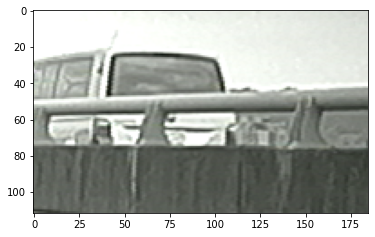

001645:GT:-1.92, REG:1.82


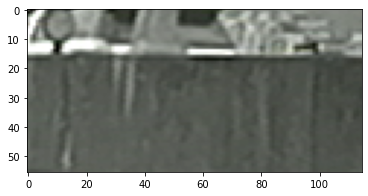

002205:GT:-1.09, REG:1.81


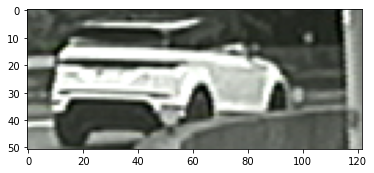

002206:GT:-1.13, REG:1.87


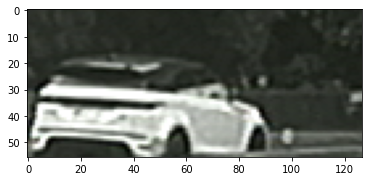

002227:GT:2.24, REG:-1.56


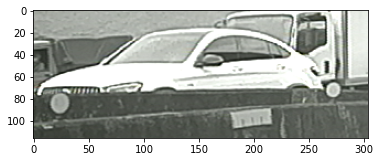

002239:GT:1.92, REG:-1.65


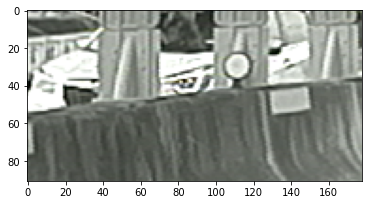

002260:GT:1.95, REG:-1.53


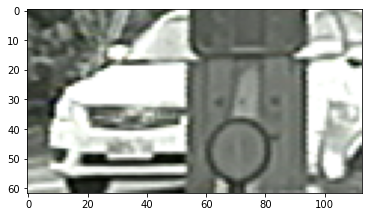

0.02339061676856391


In [ ]:
import matplotlib.pyplot as plt
valset = [x.strip() for x in open('Elan_3d_box/ImageSets/val.txt').readlines()]
dim_GT = list()
dim_ELAN = list()
alpha_GT = list()
alpha_ELAN = list()

result_root = 'V_alpha_B4_N0'


for id_ in valset:
    gt_lines = [x.strip() for x in open(f'Elan_3d_box/renew_label_obj/{id_}.txt').readlines()]
    gt_objects = [TrackingObject(line) for line in gt_lines if line.split()[0].lower()=='car']
    pred_lines = [x.strip() for x in open(f'{result_root}/label_2/{id_}.txt').readlines()]
    pred_objects = [TrackingObject(line) for line in pred_lines if line.split()[0].lower()=='car']
    image = cv2.cvtColor(cv2.imread(f'Elan_3d_box/image_2/{id_}.png'), cv2.COLOR_BGR2RGB)
    for i in range(len(gt_objects)):
        gt = gt_objects[i]
        pred = pred_objects[i]
        
        alpha_GT.append(gt.alphas[0])
        alpha_ELAN.append(pred.alphas[0])
        if np.cos(gt.alphas[0] - pred.alphas[0]) < 0.8:
            print(f'{id_}:GT:{gt.alphas[0]}, REG:{pred.alphas[0]}')
            gt_crop = image[gt.box2d[0][1]:gt.box2d[1][1]+1, gt.box2d[0][0]:gt.box2d[1][0]+1]
            pred_crop = image[pred.box2d[0][1]:pred.box2d[1][1]+1, pred.box2d[0][0]:pred.box2d[1][0]+1]
            plt.imshow(pred_crop)
            plt.show()

alpha_GT = np.array(alpha_GT)
alpha_ELAN = np.array(alpha_ELAN)
alpha_diff = np.cos(alpha_GT-alpha_ELAN)
print(1-alpha_diff.mean())

## Eval result : improvement of objects

In [ ]:
import glob
trainset = [x.strip() for x in open('Elan_3d_box/ImageSets/train.txt').readlines()]
valset = [x.strip() for x in open('Elan_3d_box/ImageSets/val.txt').readlines()]
val_images = sorted(glob.glob('Elan_3d_box/image_2/*.png'))[-1*len(valset):] 
GT_labels = sorted(glob.glob('Elan_3d_box/renew_label/*.txt'))[-1*len(valset):]

# video_ELAN video_IMAGENET
V_labels = sorted(glob.glob('video_ELAN/label_2/*.txt'))[-1*len(valset):]
# BL_ELAN BL_IMAGENET
BL_labels = sorted(glob.glob('BL_ELAN/label_2/*.txt'))[-1*len(valset):]
assert len(valset) == len(V_labels), 'video_label length diff'
assert len(valset) == len(BL_labels), 'BL_label length diff'

GT_tracking_dict = tracking_obj_by_labels(GT_labels, val_images, WRITE_FILE=False)
V_tracking_dict = tracking_obj_by_labels(V_labels, val_images, WRITE_FILE=False)
BL_tracking_dict = tracking_obj_by_labels(BL_labels, val_images, WRITE_FILE=False)

0
500
0
500
0
500


In [ ]:
other_count = 0
c = 0
dim_GT_1 = list()
dim_V_1 = list()
dim_BL_1 = list()

dim_GT_f = list()
dim_V_f = list()
dim_BL_f = list()

classes = ['motor', 'bus', 'car']
for key in GT_tracking_dict.keys():
    GT_obj = GT_tracking_dict[key]
    V_obj = V_tracking_dict[key]
    BL_obj = BL_tracking_dict[key]
    if GT_obj.class_.lower() != 'car':
        other_count += 1
        continue
    if (V_obj.box2d != BL_obj.box2d).all() or (V_obj.box2d != GT_obj.box2d).all() or (GT_obj.box2d != BL_obj.box2d).all():
        print('Box 2D diff:', key)
        break
        
    if len(GT_obj.frames) == 1:
        dim_GT_1.append(GT_obj.dims[0])
        dim_V_1.append(V_obj.dims[0])
        dim_BL_1.append(BL_obj.dims[0])
    else:
        dim_GT_f += GT_obj.dims
        dim_V_f += V_obj.dims
        dim_BL_f += BL_obj.dims
    c += 1 

In [ ]:
dim_GT_1 = np.array(dim_GT_1)
dim_V_1 = np.array(dim_V_1)
dim_BL_1 = np.array(dim_BL_1)
dim_GT_f = np.array(dim_GT_f)
dim_V_f = np.array(dim_V_f)
dim_BL_f = np.array(dim_BL_f)

V_dim_diff_1 = np.mean(abs(dim_GT_1 - dim_V_1), axis=0)
BL_dim_diff_1 = np.mean(abs(dim_GT_1 - dim_BL_1), axis=0)
print('1 frame')

print(BL_dim_diff_1)
print(V_dim_diff_1)

V_dim_diff_f = np.mean(abs(dim_GT_f - dim_V_f), axis=0)
BL_dim_diff_f = np.mean(abs(dim_GT_f - dim_BL_f), axis=0)
print('multi- frame')
print(BL_dim_diff_f)
print(V_dim_diff_f)

1 frame
[0.236875 0.21625  0.817875]
[0.174875 0.178625 0.608625]
multi- frame
[0.21197952 0.15894198 0.66158703]
[0.1937372  0.13837884 0.56926621]


In [ ]:
V_dim_diff_1 = abs(dim_GT_1 - dim_V_1)
BL_dim_diff_1 = abs(dim_GT_1 - dim_BL_1)
V_dim_diff_f = abs(dim_GT_f - dim_V_f)
BL_dim_diff_f = abs(dim_GT_f - dim_BL_f)

BL = np.concatenate((BL_dim_diff_1, BL_dim_diff_f))
print(np.mean(BL, axis=0))

V = np.concatenate((V_dim_diff_1, V_dim_diff_f))
print(np.mean(V, axis=0))

[0.21496997 0.16582583 0.68036036]
[0.19147147 0.14321321 0.57399399]


# 0911 KITTI Tracking Dataset

[Alpha diff] abs_mean: 0.4186
[DIM diff] H:0.1390, W:0.1596, L:0.3193


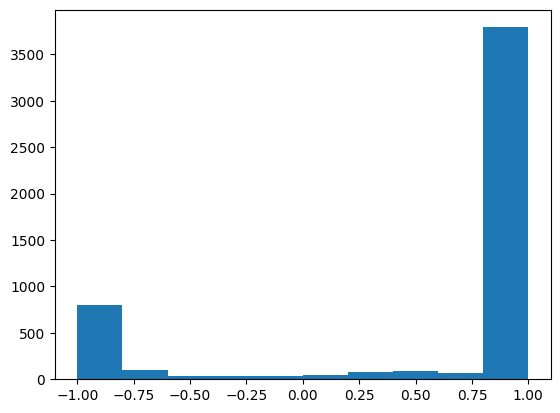

In [ ]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
from torch_lib.KITTI_Dataset import Object3d
cls_list = ['car']
diff_list = [1, 2]

gt_root='Kitti/training/label_2'
result_root='0907/Track_KITTI_BL_B4_vgg'
val_ids = [x.strip() for x in open('Kitti/ImageSets/val.txt').readlines()]

GT_dim = list()
GT_depth = list()
GT_alpha = list()
REG_dim = list()
REG_depth = list()
REG_alpha = list()

for id_ in val_ids:
    gt_label = os.path.join(gt_root, f'{id_}.txt')
    gt_objects = [Object3d(line) for line in open(gt_label).readlines()]
    reg_label = os.path.join(result_root, f'{id_}.txt')
    reg_objects = [Object3d(line) for line in open(reg_label).readlines()]

    for gt, reg in zip(gt_objects, reg_objects):
        if gt.cls_type in cls_list and gt.level in diff_list:
            GT_dim.append(gt.dim)
            GT_depth.append(gt.pos[2])
            GT_alpha.append(gt.alpha)

            REG_dim.append(reg.dim)
            REG_depth.append(reg.pos[2])
            REG_alpha.append(reg.alpha)
            
GT_dim = np.array(GT_dim)
GT_depth = np.array(GT_depth)
GT_alpha = np.array(GT_alpha)
REG_dim = np.array(REG_dim)
REG_depth = np.array(REG_depth)
REG_alpha = np.array(REG_alpha)

alpha_diff = np.cos(GT_alpha - REG_alpha)
dim_diff = np.mean(abs(GT_dim - REG_dim), axis=0)
print(f'[Alpha diff] abs_mean: {1-alpha_diff.mean():.4f}')
print(f'[DIM diff] H:{dim_diff[0]:.4f}, W:{dim_diff[1]:.4f}, L:{dim_diff[2]:.4f}')
plt.hist(alpha_diff)
plt.show()

## 0913 Length Analysis

In [77]:
## 0919
import os
from torch_lib.KITTI_Dataset import *

gt_root='Kitti/training/label_2'
result_root='_REG_labels/0822/KITTI_BL_B4_vgg'
val_ids = [x.strip() for x in open('Kitti/ImageSets/val.txt').readlines()]
cls_list = ['car']
diff_list = [1,2]
GT_L, GT_alpha = list(), list()
REG_L, REG_alpha = list(), list()
for id_ in val_ids:
    gt_label = os.path.join(gt_root, f'{id_}.txt')
    gt_objects = [Object3d(line) for line in open(gt_label).readlines()]
    reg_label = os.path.join(result_root, f'{id_}.txt')
    reg_objects = [Object3d(line) for line in open(reg_label).readlines()]
    count = 0
    for i in range(len(gt_objects)):
        gt = gt_objects[i]
        if gt.cls_type.lower() in cls_list and gt.level in diff_list:
            #print(gt.alpha, reg.alpha)
            reg = reg_objects[count]
            GT_L.append(gt.dim[2])
            GT_alpha.append(gt.alpha)
            REG_L.append(reg.dim[2])
            REG_alpha.append(reg.alpha)
            count+=1

GT_L = np.array(GT_L)
GT_alpha = np.array(GT_alpha)
REG_L = np.array(REG_L)
REG_alpha = np.array(REG_alpha)

degree_18 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.3), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.3)))
degree_40 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.7), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.7)))
degree_90 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) <= 1), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) <= 1)))

degree_18_40 = [d for d in degree_40[0] if d not in degree_18[0]]
degree_40_90 = [d for d in degree_90[0] if d not in degree_40[0]]

print('ALL:', GT_L.shape[0], np.mean(abs(GT_L-REG_L)))
for condition in [degree_18, degree_18_40, degree_40_90]:
    gt = GT_L[condition]
    reg = REG_L[condition]
    print(gt.shape[0], np.mean(abs(gt-reg))) #0-18, #18-40, #40-90


ALL: 8160 0.29492277
4874 0.3203816
245 0.2623673
3041 0.2567412


In [76]:
## 0919
import os
from torch_lib.KITTI_Dataset import *

gt_root='Kitti/training/label_2'
result_root='0822_aug/KITTI_BL_B4_vgg'
val_ids = [x.strip() for x in open('Kitti/ImageSets/val.txt').readlines()]
cls_list = ['car']
diff_list = [1,2]
GT_L, GT_alpha = list(), list()
REG_L, REG_alpha = list(), list()
for id_ in val_ids:
    gt_label = os.path.join(gt_root, f'{id_}.txt')
    gt_objects = [Object3d(line) for line in open(gt_label).readlines()]
    reg_label = os.path.join(result_root, f'{id_}.txt')
    reg_objects = [Object3d(line) for line in open(reg_label).readlines()]
    count = 0
    for i in range(len(gt_objects)):
        gt = gt_objects[i]
        if gt.cls_type.lower() in cls_list and gt.level in diff_list:
            #print(gt.alpha, reg.alpha)
            reg = reg_objects[count]
            GT_L.append(gt.dim[2])
            GT_alpha.append(gt.alpha)
            REG_L.append(reg.dim[2])
            REG_alpha.append(reg.alpha)
            count+=1

GT_L = np.array(GT_L)
GT_alpha = np.array(GT_alpha)
REG_L = np.array(REG_L)
REG_alpha = np.array(REG_alpha)

degree_18 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.3), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.3)))
degree_40 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.7), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.7)))
degree_90 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) <= 1), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) <= 1)))

degree_18_40 = [d for d in degree_40[0] if d not in degree_18[0]]
degree_40_90 = [d for d in degree_90[0] if d not in degree_40[0]]

print('ALL:', GT_L.shape[0], np.mean(abs(GT_L-REG_L)))
for condition in [degree_18, degree_18_40, degree_40_90]:
    gt = GT_L[condition]
    reg = REG_L[condition]
    print(gt.shape[0], np.mean(abs(gt-reg))) #0-18, #18-40, #40-90


ALL: 8160 0.2874228
4874 0.30451375
245 0.24522448
3041 0.2634298


In [49]:

degree_18 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.3), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.3)))
degree_40 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.7), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.7)))
degree_90 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) <= 1), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) <= 1)))

degree_18_40 = [d for d in degree_40[0] if d not in degree_18[0]]
degree_40_90 = [d for d in degree_90[0] if d not in degree_40[0]]

print(GT_L.shape[0], np.mean(abs(GT_L-REG_L)))
for condition in [degree_18, degree_18_40, degree_40_90]:
    gt = GT_L[condition]
    reg = REG_L[condition]
    print(gt.shape[0], np.mean(abs(gt-reg)))

8160 0.29492277
4874 0.3203816
245 0.2623673
3041 0.2567412


In [47]:
degree_18_40 = [d for d in degree_40[0] if d not in degree_18[0]]
degree_40_90 = [d for d in degree_90[0] if d not in degree_40[0]]
print(len(degree_18[0]))
print(len(degree_18_40))
print(len(degree_40_90))
print(len(GT_L))

4874
245
3041
8160


In [1]:
def project_3d_pt_float(pt, cam_to_img, calib_file=None):
    if calib_file is not None:
        cam_to_img = get_calibration_cam_to_image(calib_file)
        R0_rect = get_R0(calib_file)
        Tr_velo_to_cam = get_tr_to_velo(calib_file)

    point = np.array(pt)
    point = np.append(point, 1)

    point = np.dot(cam_to_img, point)
    # point = np.dot(np.dot(np.dot(cam_to_img, R0_rect), Tr_velo_to_cam), point)

    point = point[:2]/point[2]
    #point = point.astype(np.int16)
    point = np.round(point, 2)

    return point

def box2d_overlap(box1, box2):
    box1 = np.array(box1, dtype=np.int32).flatten()
    box2 = np.array(box2, dtype=np.int32).flatten()    
    #計算重疊方形座標
    x1 = max(box1[0], box2[0]) # left
    y1 = max(box1[1], box2[1]) # top
    x2 = min(box1[2], box2[2]) # right
    y2 = min(box1[3], box2[3]) # btm
    return [[x1, y1], [x2, y2]]

def box2d_area(box):
    if len(box)==2: #[ [left, top], [right, btm] ]
        area = (box[1][0]-box[0][0])*(box[1][1]-box[0][1])
    elif len(box)==4: #[left, top, right, btm]
        area = (box[2]-box[0])*(box[3]-box[1]) #有可能會overflow    
    return area



In [2]:
from torch_lib.KITTI_Dataset import *
from torch_lib.Model_heading_bin import *
from library.ron_utils import *

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import vgg, resnet, densenet
from torch.utils import data
from torchvision import transforms


cfg = {'path':'Kitti/training',
            'class_list':['car'], 'diff_list': [1, 2], #0:DontCare, 1:Easy, 2:Moderate, 3:Hard, 4:Unknown
            'bins': 4, 'cond':False, 'group':False, 'network':0}

process = transforms.Compose([transforms.ToTensor(), 
                            transforms.Resize([224,224], transforms.InterpolationMode.BICUBIC), 
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
dataset_train = KITTI_Dataset(cfg, process, split='train')

/home/ron/anaconda3/envs/elan_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
params = {'batch_size': 16, 'shuffle': False}
device = torch.device('cuda:0')
my_vgg = vgg.vgg19_bn(weights='DEFAULT') #512x7x7
model = vgg_Model(features=my_vgg.features, bins=4).to(device)
train_loader = data.DataLoader(dataset_train, **params)

for batch_L, labels_L, batch_R, labels_R in train_loader:

    gt_residual = labels_L['Heading_res'].float().to(device)
    gt_bin = labels_L['Heading_bin'].long().to(device)#這個角度在哪個class上
    gt_dim = labels_L['Dim_delta'].float().to(device)
    gt_theta_ray_L = labels_L['Theta_ray'].numpy()
    gt_theta_ray_R = labels_R['Theta_ray'].numpy()
    gt_depth = labels_L['Depth'].float().to(device)
    gt_img_W = labels_L['img_W']
    gt_box2d = labels_L['Box2d'].numpy()
    gt_calib = labels_L['Calib'].numpy()
    gt_class = labels_L['Class']

    batch_L=batch_L.float().to(device)
    batch_R=batch_R.float().to(device)
    [residual_L, bin_L, dim_L] = model(batch_L)

    #reg_alphas
    angle_per_class=2*np.pi/float(4)
    bin_argmax = torch.max(bin_L, dim=1)[1]
    reg_alpha = angle_per_class*bin_argmax + residual_L[torch.arange(len(residual_L)), bin_argmax]
    reg_alpha = reg_alpha.cpu().detach().numpy()
    #reg_dims
    reg_dim = dataset_train.get_cls_dim_avg('car') + dim_L.cpu().detach().numpy()
    iou_loss = calc_iou_loss(gt_box2d, gt_theta_ray_L, reg_dim, reg_alpha, gt_calib)
    print(iou_loss)
    break

tensor(0.3665)


In [5]:
angle_per_class=2*np.pi/float(4)
bin_argmax = torch.max(bin_L, dim=1)[1]
reg_alpha = angle_per_class*bin_argmax + residual_L[torch.arange(len(residual_L)), bin_argmax]
reg_alpha = reg_alpha.cpu().detach().numpy()
reg_dim = dataset_train.get_cls_dim_avg('car') + dim_L.cpu().detach().numpy()
#gt_box2d = gt_box2d

In [6]:
def loc3d_2_box2d(orient, location, dimension, cam_to_img):
    prj_points = []
    R = np.array([[np.cos(orient), 0, np.sin(orient)], [0, 1, 0], [-np.sin(orient), 0, np.cos(orient)]])
    corners = create_corners(dimension, location, R)
    for corner in corners:
        point = project_3d_pt(corner, cam_to_img)
        prj_points.append(point)

    prj_points = np.array(prj_points)
    prj_points_X = prj_points[:,0]
    prj_points_Y = prj_points[:,1]
    prj_box = [min(prj_points_X), min(prj_points_Y), max(prj_points_X), max(prj_points_Y)]
    prj_box = np.array(prj_box, dtype=np.int32)
    return prj_box

def calc_iou_loss(gt_box2d, gt_theta_ray, reg_dim, reg_alpha, calib):
    iou_loss = torch.tensor(0.0)
    reg_ry = reg_alpha + gt_theta_ray
    for i in range(len(reg_dim)):
        reg_loc, _ = calc_location(reg_dim[i], calib[i], gt_box2d[i], reg_ry[i], gt_theta_ray[i])
        prj_box2d = loc3d_2_box2d(reg_ry[i], reg_loc, reg_dim[i], calib[i])
        iou_loss += torch.tensor(1 - calc_iou_2d(gt_box2d[i], prj_box2d))
    return iou_loss / len(reg_dim)

In [11]:
def calc_IoU_2d(box1, box2):
    box1 = np.array(box1, dtype=np.int32).flatten()
    box2 = np.array(box2, dtype=np.int32).flatten()
    area1 = (box1[2]-box1[0])*(box1[3]-box1[1])
    area2 = (box2[2]-box2[0])*(box2[3]-box2[1])
    area_sum = abs(area1) + abs(area2)
    
    #計算重疊方形座標
    x1 = max(box1[0], box2[0]) # left
    y1 = max(box1[1], box2[1]) # top
    x2 = min(box1[2], box2[2]) # right
    y2 = min(box1[3], box2[3]) # btm

    if x1 >= x2 or y1 >= y2:
        return 0
    else:
        area_overlap = abs((x2-x1)*(y2-y1))

    area_union = area_sum-area_overlap
    return area_overlap/area_union

def calc_GIoU_2d(box1, box2):
    box1 = np.array(box1, dtype=np.int32).flatten()
    box2 = np.array(box2, dtype=np.int32).flatten()
    area1 = (box1[2]-box1[0])*(box1[3]-box1[1])
    area2 = (box2[2]-box2[0])*(box2[3]-box2[1])
    area_sum = abs(area1) + abs(area2)

    #計算重疊方形座標
    x1 = max(box1[0], box2[0]) # left
    y1 = max(box1[1], box2[1]) # top
    x2 = min(box1[2], box2[2]) # right
    y2 = min(box1[3], box2[3]) # btm

    if x1 >= x2 or y1 >= y2:
        return 0
    else:
        area_overlap = abs((x2-x1)*(y2-y1))

    area_union = area_sum-area_overlap
    IoU = area_overlap/area_union

    #計算凸型面積 (包住AB的長方形 - union AB)
    x1 = min(box1[0], box2[0]) # left
    y1 = min(box1[1], box2[1]) # top
    x2 = max(box1[2], box2[2]) # right
    y2 = max(box1[3], box2[3]) # btm
    
    if x1 >= x2 or y1 >= y2:
        area_C = 0
    else:
        area_C = abs((x2-x1)*(y2-y1))

    GIoU= IoU - (area_C-area_union)/area_C
    return GIoU

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.5128240390565908
GIoU 0.4121499929246262


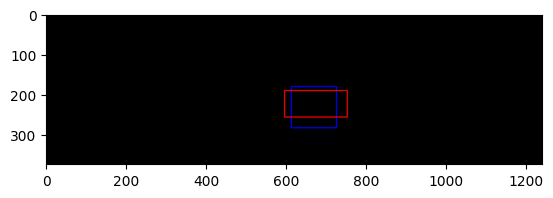

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.674432863274065
GIoU 0.6629177117589136


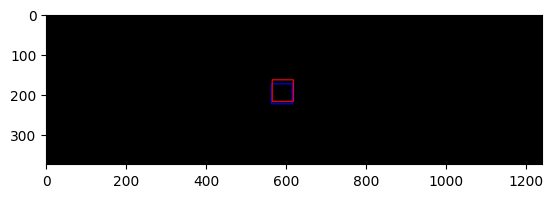

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.5385035499726926
GIoU 0.45308896455810715


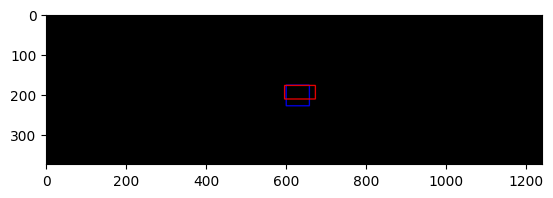

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.4401114931749505
GIoU 0.36405488395188323


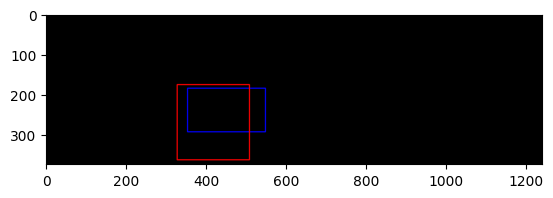

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.5747450837581938
GIoU 0.5193615268266493


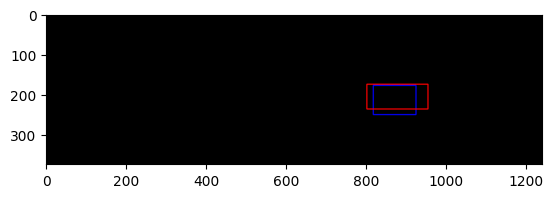

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.5936234817813765
GIoU 0.5559611441190389


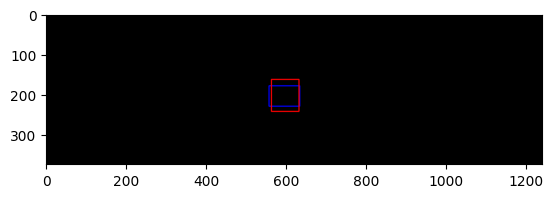

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.4878048780487805
GIoU 0.39891598915989157


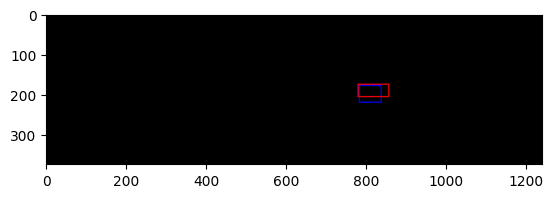

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.4224242424242424
GIoU 0.34835016835016835


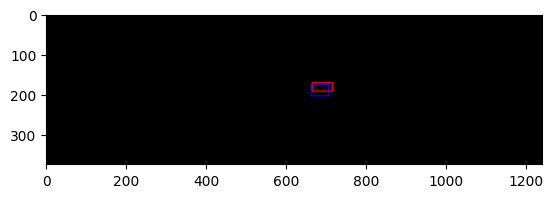

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.486815415821501
GIoU 0.37751098944390393


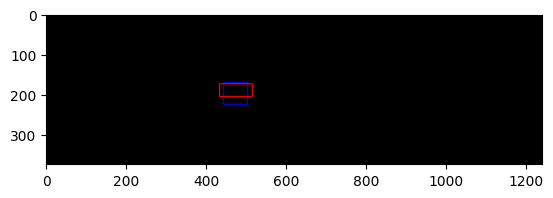

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.568222090962788
GIoU 0.5098238707180717


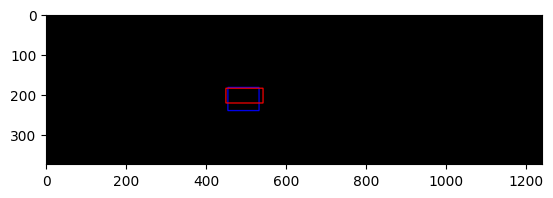

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.47668393782383417
GIoU 0.4332222527304297


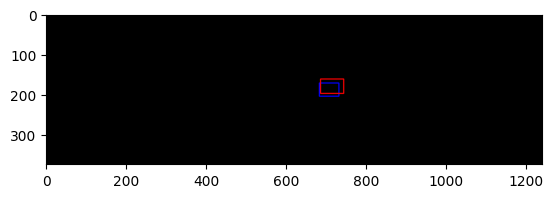

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.44036697247706424
GIoU 0.3993112540019909


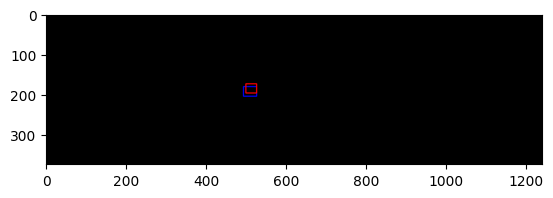

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.4770857814336075
GIoU 0.43541911476694084


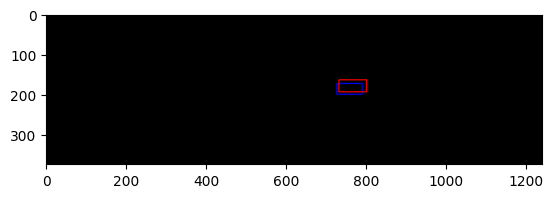

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.370253164556962
GIoU 0.23838503268883013


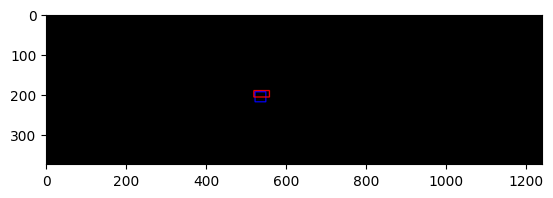

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.37209302325581395
GIoU 0.26792635658914726


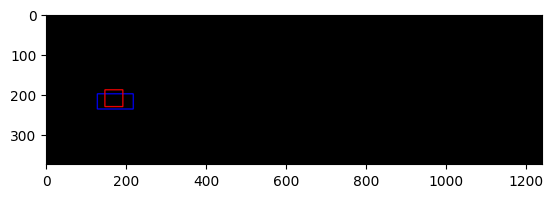

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IoU 0.6286947141316074
GIoU 0.6165463765356994


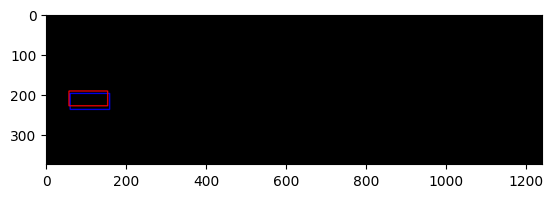

In [14]:
import matplotlib.pyplot as plt
calib = FrameCalibrationData(f'Kitti/training/calib/000000.txt')
reg_ry = reg_alpha + gt_theta_ray_L
proj_matrix = calib.p2

for i in range(len(reg_dim)):
    reg_loc, _ = calc_location(reg_dim[i], proj_matrix, gt_box2d[i], reg_ry[i], gt_theta_ray_L[i])
    prj_box2d = loc3d_2_box2d(reg_ry[i], reg_loc, reg_dim[i], gt_calib[i])
    empty = np.zeros((375, 1242, 3))
    
    cv2.rectangle(empty, (gt_box2d[i][0], gt_box2d[i][1]), (gt_box2d[i][2], gt_box2d[i][3]), (0,0,255), 2)
    cv2.rectangle(empty, (prj_box2d[0], prj_box2d[1]), (prj_box2d[2], prj_box2d[3]), (255,0,0), 2)
    print('IoU', calc_IoU_2d(gt_box2d[i], prj_box2d))
    print('GIoU',calc_GIoU_2d(gt_box2d[i], prj_box2d))
    plt.imshow(empty)
    plt.show()
    


In [36]:
from library.Plotting import *
from torch_lib.KITTI_Dataset import *
import glob, cv2
import numpy as np
import matplotlib.pyplot as plt
from library.ron_utils import calc_iou_2d

labels = sorted(glob.glob('Kitti/training/label_2/*.txt'))
images = sorted(glob.glob('Kitti/training/image_2/*.png'))
#calibs = sorted(glob.glob('Kitti/training/calib/*.txt')) #因為也有track的calib所以混在一起

reg_labels = sorted(glob.glob('/*.txt'))
train_ids = [x.strip() for x in open('Kitti/ImageSets/train.txt').readlines()]
val_ids = [x.strip() for x in open('Kitti/ImageSets/val.txt').readlines()]

IOUs = list()

for id_ in train_ids:
    calib = FrameCalibrationData(f'Kitti/training/calib/{id_}.txt')
    
    img = cv2.cvtColor(cv2.imread(f'Kitti/training/image_2/{id_}.png'), cv2.COLOR_BGR2RGB)
    lines = open(f'Kitti/training/label_2/{id_}.txt').readlines()
    
    img_2d = np.copy(img)
    img_3d = np.copy(img)
    reg_img_2d = np.copy(img)
    reg_img_3d = np.copy(img)
    reg_lines = open(f'0822_aug/KITTI_BL_B4_vgg/{id_}.txt').readlines()
    count=0
    for i in range(len(lines)):
        line = lines[i].split()
        class_ = line[0]
        truncation = float(line[1])
        occlusion = float(line[2])
        height = float(line[7]) - float(line[5]) + 1
        if class_.lower() in ['car'] and ((height >= 40 and truncation <= 0.15 and occlusion <= 0) or (height >= 25 and truncation <= 0.3 and occlusion <= 1)):

            for j in range(1,15):
                line[j] = float(line[j])
            
            box_2d = [line[4], line[5], line[6], line[7]]
            box2d = np.array([[int(line[4]), int(line[5])], [int(line[6]), int(line[7])]])
            dim = np.array([line[8], line[9], line[10]])
            loc = np.array([line[11], line[12], line[13]])
            loc[1] -= dim[0]/2
            orient = line[14]
            #plot_2d_box(img_3d, box2d)
            #plot_3d_box(img_3d, calib.p2, orient, dim, loc) # 3d boxes
            #print('GT', box2d)

            # REG PART
            reg_line = reg_lines[count].split()
            for j in range(1,15):
                reg_line[j] = float(reg_line[j])

            box_2d = [reg_line[4], reg_line[5], reg_line[6], reg_line[7]]
            box2d = np.array([[int(reg_line[4]), int(reg_line[5])], [int(reg_line[6]), int(reg_line[7])]])
            reg_dim = np.array([reg_line[8], reg_line[9], reg_line[10]])
            reg_loc = np.array([reg_line[11], reg_line[12], reg_line[13]])
            reg_loc[1] -= reg_dim[0]/2
            orient = line[14]

            R = np.array([[np.cos(orient), 0, np.sin(orient)], [0, 1, 0], [-np.sin(orient), 0, np.cos(orient)]])
            corners = create_corners(reg_dim, location=reg_loc, R=R)
            prj_points = []
            for corner in corners:
                point = project_3d_pt_float(corner, calib.p2)
                prj_points.append(point)
            
            prj_points = np.array(prj_points)
            prj_points_X = prj_points[:,0]
            prj_points_Y = prj_points[:,1]
            prj_box = [[min(prj_points_X), min(prj_points_Y)],[max(prj_points_X), max(prj_points_Y)]]
            prj_box = np.array(prj_box, dtype=np.int32)
            #print('REG PROJ:', prj_box)
            #plot_3d_box(reg_img_3d, calib.p2, orient, reg_dim, reg_loc) # 3d boxes
            count+=1
            #print('BOX diff', box2d-prj_box)
            #print('Dim diff', dim-reg_dim)
            #overlap = box2d_overlap(box2d, prj_box)
            #cv2.rectangle(reg_img_3d, box2d[0], box2d[1], (0,0,255), 2)
            #cv2.rectangle(reg_img_3d, prj_box[0], prj_box[1], (255,0,0), 2)
            #cv2.rectangle(reg_img_3d, overlap[0], overlap[1], (0,255,0), -1)
            IOU = calc_iou_2d(box_2d, prj_box)
            IOUs.append(IOU)
            GT_area = box2d_area(box_2d)
            PRJ_area = box2d_area(prj_box)
            #print('iou', round(IOU,2))
            
            #prj_box = prj_box.flatten()
            #print(prj_box[1][0]-prj_box[0][0])
            #print(prj_box[1][1]-prj_box[0][1])
            #print((prj_box[1][0]-prj_box[0][0])*(prj_box[1][1]-prj_box[0][1]))
            #print(prj_box.flatten())
            
            #overlap = np.array(overlap).flatten()
            #overlap_area = box2d_area(overlap)
            #print('GT', GT_area, 'PRJ', PRJ_area, 'OVER', overlap_area)

    #print(id_)
            #plt.imshow(img_3d)
            #plt.show()
            #plt.imshow(reg_img_3d)
            #plt.show()


NameError: name 'project_3d_pt_float' is not defined

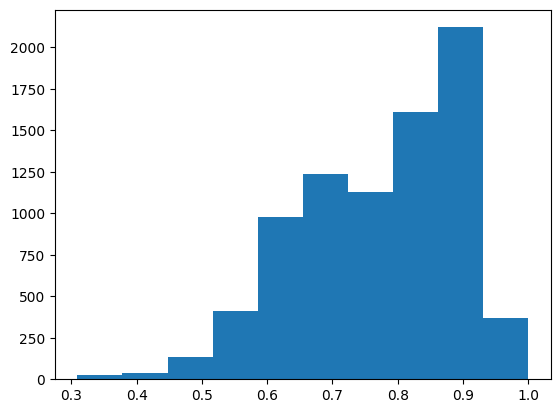

In [8]:
import matplotlib.pyplot as plt
IOUs = np.array(IOUs)
plt.hist(IOUs)
plt.show()